In [106]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [107]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"

In [108]:
iris_train = pd.read_csv("C:\\Users\\Timofey\\Documents\\Data\\train_iris.csv", index_col=0)
iris_test = pd.read_csv("C:\\Users\\Timofey\\Documents\\Data\\test_iris.csv", index_col=0)



In [109]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [110]:
X_train = iris_train.drop(['species'], axis=1)
y_train = iris_train.species
X_test = iris_test.drop(['species'], axis=1)
y_test = iris_test.species
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [111]:
score_data = pd.DataFrame()
rs = np.random.seed(0)

In [112]:
max_depth_val = range(1, 100)
for max_depth in max_depth_val:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'tr_score': [tr_score],
                                    'test_score': [test_score]})
    score_data = pd.concat([score_data, temp_score_data])
    

In [113]:
score_data.head(10)

,max_depth,tr_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
0,6,1.00,0.94
0,7,1.00,0.94
0,8,1.00,0.92
0,9,1.00,0.92
0,10,1.00,0.92


<Axes: xlabel='max_depth', ylabel='score'>

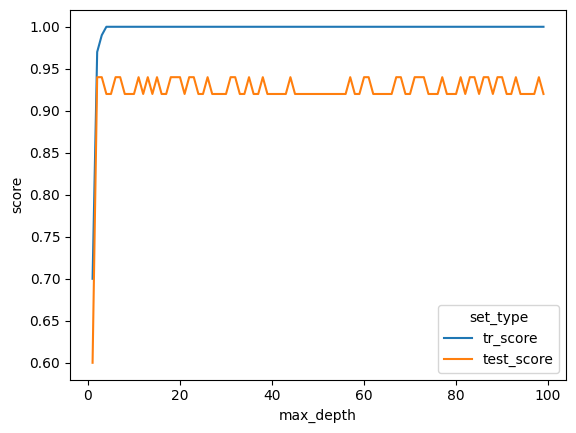

In [114]:
scores_data_long = pd.melt(score_data, id_vars = ['max_depth'], value_vars = ['tr_score','test_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)